<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/Multi_LR_IRIS-MOD_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import sklearn.datasets  # to import iris
import matplotlib.pyplot as plt  # %matplotlib inline # this line şs for jupyter notebooks



In [2]:

#load data as numpy array using genfromtxt
train_data = pd.read_csv('https://drive.google.com/uc?id=1vJwVLSGvbSK1kE8n2RNifUxCVMWu6PmY', delimiter=',')
train_data.head()
rows = train_data.shape[0]
cols = train_data.shape[1]
scores = train_data[['x1', 'x2']].values
results = train_data['y'].values
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores
X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)
print(X.shape)
print(y.shape)
m_train=X.shape[0]
print(m_train)

(100, 3)
(100, 1)
100


In [3]:
train_data.head()

,x1,x2,y
0,22.63,61.39,0
1,99.38,27.28,1
2,94.32,66.42,2
3,23.43,40.44,0
4,98.36,8.14,1


In [4]:
#load test data as numpy array using genfromtxt
test_data = pd.read_csv('https://drive.google.com/uc?id=1j4euqcEGkQfVZEzNOA0_3qblEI9vx6Hp')
#no of test samples
rows_test = test_data.shape[0]
cols_test = test_data.shape[1]
scores_test = test_data[['x1', 'x2']].values
results_test = test_data['y'].values
mean_scores_test = np.mean(scores_test, axis=0)
std_scores_test = np.std(scores_test, axis=0)
scores_test = (scores_test - mean_scores_test) / std_scores_test
test_X = np.append(np.ones((rows_test, 1)), scores_test, axis=1) #include intercept
test_y = results_test.reshape(rows_test, 1)
test_m =test_X.shape[0]

print(test_X.shape)
print(test_y.shape)
print(test_m)


(10, 3)
(10, 1)
10


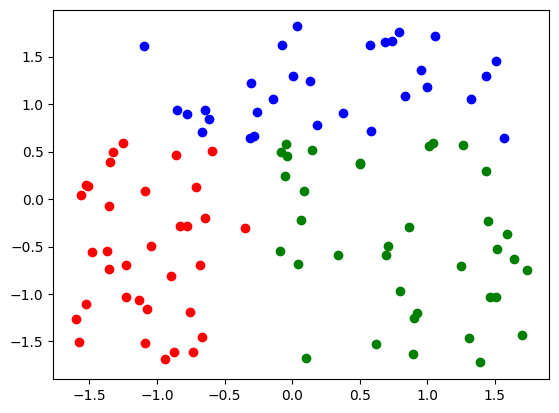

In [5]:

colors = ['r', 'g', 'b']
for c in np.unique(y):
    plt.plot(scores[results== c, 0], scores[results == c, 1], 'o', color=colors[int(c)])
# also print our test datapoint



In [6]:
y1=y.flatten()
y1=np.sort(y1)
y=y1
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [7]:
 # model for class 0
y_0 = np.copy(y)
y_0[y == 2] = 1.0 # Fixed: flatten y for consistent indexing
y_0 = y_0 - 1.0
y_0 = abs(y_0 * -1.0)

In [8]:
print(y_0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [9]:
# model for class 1
y_1 = np.copy(y)
y_1[y == 2] = 1
y_1[y == 2] = 0

In [10]:
print(y_1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
# model for class 2
y_2 = np.copy(y)
y_2[y == 1] = 0
y_2[y  == 2] = 1


In [12]:
print(y_2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [13]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))


In [14]:
def hypotesis(x,theta):
    z = np.dot(x, theta)
    h = sigmoid(z)
    return h

In [15]:

# define cost function
# J(theta) = 1/m (-y^T log(h) - (1-y)^T log(1-h) )
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)) / y.size

In [25]:
def gradiente(x,y,theta,alfa,iteraciones,epsilon):
  import  math
  m=len(y)
  J_vals = []
  prev = math.inf
  for i in range(iteraciones):
      h = hypotesis(X, theta)
      cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
      J_vals.append(cost)
      if(abs( J_vals[i]- prev) < epsilon) :
             print("Convergencia Alcanzada !", i ," iteraciones")
             break
      prev = J_vals[i]
      gradient = np.dot(X.T, (h - y)) / m
      theta -= alpha * gradient
    #if i % 20000 == 0:
    #   print('iteracion ',i,'coste ', cost)
  print('Adjusted coefficient: {}'.format(theta))
  print("cost: {}".format(J_vals[i]))
  return theta, J_vals

In [34]:

y_0_reshaped = y_0.reshape(-1, 1)
y_1_reshaped = y_1.reshape(-1, 1)
y_2_reshaped = y_2.reshape(-1, 1)

In [42]:
# logistic regression parameters
num_iter = 2500000
alpha = 0.0001
epsilon = 1e-8

In [43]:
theta = np.zeros((cols , 1))
theta_0, costs0 = gradiente(X, y_0_reshaped, theta, alpha, num_iter, epsilon)
theta = np.zeros((cols , 1))
theta_1, costs1 = gradiente(X, y_1_reshaped, theta, alpha, num_iter, epsilon)
theta = np.zeros((cols , 1))
theta_2, costs2 = gradiente(X, y_2_reshaped, theta, alpha, num_iter, epsilon)

Convergencia Alcanzada ! 194021  iteraciones
Adjusted coefficient: [[-0.76299527]
 [ 0.96897163]
 [-0.11246817]]
cost: 0.5436016022931118
Convergencia Alcanzada ! 110692  iteraciones
Adjusted coefficient: [[-0.53355381]
 [-0.07302739]
 [ 0.00904707]]
cost: 0.6528854808824869
Convergencia Alcanzada ! 249245  iteraciones
Adjusted coefficient: [[-1.01594667]
 [-1.01626004]
 [ 0.20428942]]
cost: 0.5197581634127986


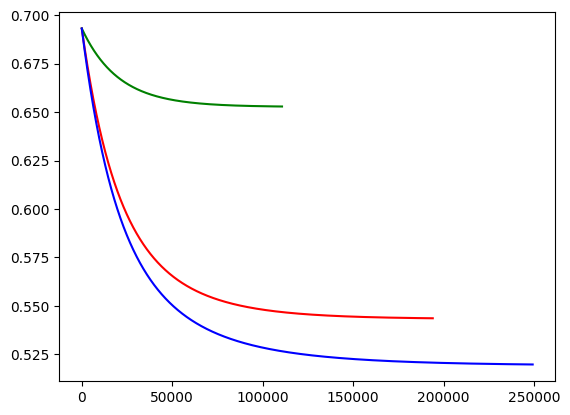

In [47]:
plt.plot(costs0,label='class 0', c='r')
plt.plot(costs1,label='class 1', c='g')
plt.plot(costs2, num_iter,label='class 2', c='b')
plt.show()

In [61]:
#predict
pred = np.zeros((test_m,1))
model_predict = hypotesis(test_X, theta_0)
pred[model_predict > 0.5] = 1
print(pred)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]]


##Plot the decision boundary line  
only need 2 points to define the line lets take min and max of feature 1 and calculate feature 2 based on the theta values we have

y = theta0 + theta1x1 + theta2x2, since y is 3rd dimension take y as 0 and calculate x2 to plot the decision boundary line





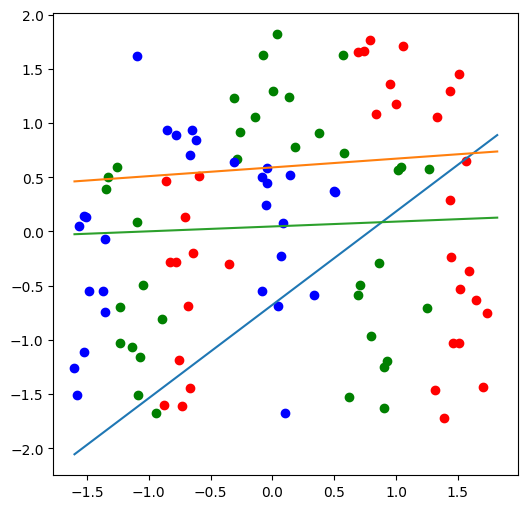

In [75]:
 #plot the decision boundary line

plot_x = np.array([min(X[:,1]),max(X[:,2])])
plot_y0 = (-1/theta_0[2] * ((theta_0[1] * plot_x) + theta_0[0]))*0.1
plot_y1 = (-1/theta_1[2] * ((theta_1[1] * plot_x) + theta_1[0]))*0.01
plot_y2 = ( -1/theta_2[2] * ((theta_2[1] * plot_x) + theta_2[0]))*0.009

plt.figure(figsize=(6,6))
plt.scatter(X[y == 0][:,1], X[y == 0][:,2], label='class 0', c='r')
plt.scatter(X[y == 1][:,1], X[y == 1][:,2], label='class 1', c='g')
plt.scatter(X[y == 2][:,1], X[y == 2][:,2], label='class 2', c='b')
plt.plot(plot_x,plot_y0)
plt.plot(plot_x,plot_y1)
plt.plot(plot_x,plot_y2)
plt.show()